# Язык Python для анализа данных
   # ` Лекция №2`

# Библиотека `NumPy`


Для работы с массивами большинство аналитиков данных пользуются библиотекой NumPy.
Это библиотека с *открытым исходным кодом*, в которой пользоваться массивами, в том числе многомерными (включая матрицы), очень удобно.
Кроме того, в ней реализована поддержка математических функций, предназначенных для работы с массивами.
Документация по библиотеке NumPy на английском языке есть на официальном сайте: https://numpy.org/

Установка NumPy не требуется, если вы пользуетесь Google Colab.

Подключают NumPy чаще всего под псевдонимом `np`:

```python
import numpy as np
```


## 1. Одномерные массивы

#### 1.1 Типы массивов, атрибуты

Тип массивов NumPy называется `ndarray`, но создавать их нужно не через конструктор этого типа, можно, например, при помощи
`np.array`.

Преобразуем список в массив.


In [123]:
import numpy as np
A = np.array([0, 6, 2, 1, 5, 6, 6, 7])
A, type(A)

(array([0, 6, 2, 1, 5, 6, 6, 7]), numpy.ndarray)

`print` печатает массивы в удобной форме.

In [ ]:
print(A)

Класс `ndarray` имеет много методов.

In [ ]:
set(dir(A)) - set(dir(object))

Наш массив одномерный.

In [ ]:
A.ndim

В $n$-мерном случае возвращается кортеж размеров по каждой координате.

In [ ]:
A.shape

`size` — это полное число элементов в массиве; `len` — размер по первой координате (в 1-мерном случае это то же самое).

In [ ]:
len(A), A.size

*Массив чисел с плавающей точкой.*
Не путать окгруление с усечением.

`numpy` предоставляет несколько типов для целых (`int16`, `int32`, `int64`) и чисел с плавающей точкой (`float32`, `float64`).

подробнее здесь: [все типы данных NumPy](https://numpy.org/doc/stable/user/basics.types.html)

---

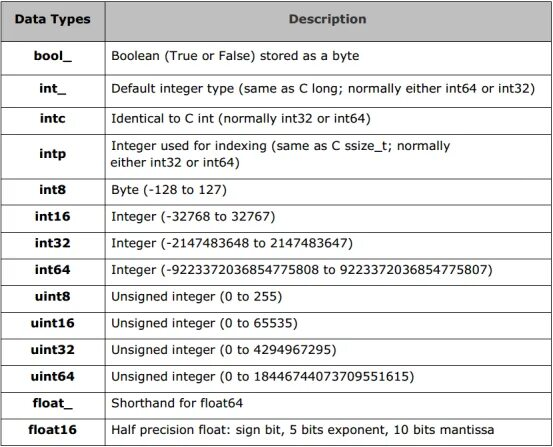


In [ ]:
A.dtype, A.dtype.name, A.itemsize

In [ ]:
B = np.array([0, 6, 2, 1, 5, 6, 6, 7.8], dtype = np.int8)
B.dtype, B.dtype.name, B.itemsize


In [ ]:
print(B)

In [ ]:
B1 = np.array([0, 6, 2, 1, 5, 6, 6, 7], dtype = np.float16)
B1.dtype, B1.dtype.name, B1.itemsize

In [ ]:
print(B1)

In [ ]:
B_round = np.array(np.round([0, 6, 2, 1, 5, 6, 6, 7.8]), dtype=np.int8)
print(B_round)

In [ ]:
C = np.array([0., 2, 1])
C.dtype

Преобразование данных.

In [ ]:
print(C.dtype)
print(C.astype(int))
print(C.astype(str))

In [ ]:
C=C.astype(bool)

print(C)


#### 1.2 Индексация

Индексировать массив можно классически.

In [ ]:
A[1]

Массивы — изменяемые объекты.

In [ ]:
A[1] = 3
A[1]
# print(A)

Массивы  можно использовать в `for` циклах, но ***не целесообразно***, так как  теряется главное преимущество `numpy` — быстродействие. Всегда, когда это возможно, лучше использовать операции над массивами как едиными целыми.

In [ ]:
for i in B:
    print(i)

#### 1.3 Создание массивов
Для работы следует создавать массивы требуемой размерности, заполненных нулями или единицами.

In [ ]:
A0 = np.zeros(9, dtype=np.float16)
B1 = np.ones(9, dtype=np.int64)
print(A0)
print(B1)

Если требуется массив размерности и типа данных уже существующего, но заполненного нулями, то необходимо использовать конструкцию.

In [ ]:
np.zeros_like(B_round)

Функция `arange` подобна `range`- генерирует массив со значениями в указаном диапазоне чисел. Если указано одно число, то левая граница прогрессии — ноль:

In [ ]:
D = np.arange(10)
D

Правая граница не входит в диапазое. Третий параметр arange — шаг прогрессии. Не всегда при этом легко идентифицировать количество элементов в этом массиве.
Для разбиения отрезков полезный метод.
*Границы массива и шаг могут быть дробными. И массив создается в памяти.*

In [ ]:
S = np.arange(0., 201, 3.2)
S[0] = 500
print(S, '\n размер: ', len(S))

Последовательности чисел с постоянным шагом можно также создавать функцией `linspace`. Начало и конец диапазона включаются; последний аргумент — число точек.

In [ ]:
S1 = np.linspace(0, 200, 63)
print(S1, '\n размер: ', len(S1))

Создание последовательности чисел от 10 до 15 с постоянным шагом, длина последовательности — 30.


In [ ]:
arr = np.linspace(10, 15, 30)
print(arr)

Последовательность чисел с постоянным шагом по логарифмической шкале, например,  от $10^0$ до $10^9$.

In [ ]:
L = np.logspace(0, 9, 5)
print(L)

## 2. Операции над одномерными массивами



#### 2.1 Массовые операции с массивами

Арифметические операции проводятся поэлементно.

In [ ]:
print(S + S1)

In [ ]:
print(S - S1)

In [ ]:
print(S * S1)

In [ ]:
print(S / 5)

In [ ]:
print(S ** 2)

NumPy применяет правила неявного приведения типов: если операнды имеют разные dtype, результат будет иметь тип, способный точно представить оба входных значения, в соответствии с правилами `type promotion`.

In [ ]:
i = np.ones(63, dtype=np.float128)
print(S.dtype, S.dtype.name, S.itemsize)
print(S + i)
(S+i).dtype, (S+i).dtype.name, (S+i).itemsize

Библиотека `numpy` содержит элементарные функции, которые тоже применяются к массивам поэлементно. Они называются универсальными функциями (`ufunc`).

In [ ]:
np.sin, type(np.sin)

In [ ]:
print(np.sin(A))

Один из операндов может быть скаляром, а не массивом.

In [ ]:
print(A + 1)

In [ ]:
print(8 * A)
print([1, 2, 2,3 ,4]*8)

Результирующий массив сравнения состоит из булевых переменных.

In [ ]:
print(S > S1)

In [ ]:
print(S == S1)

In [ ]:
S2 = S > 100
print(S)
print(S2)

В NumPy для проверки выполнения условий на массивах используются функции-кванторы: `np.any()` (*«хотя бы один элемент удовлетворяет условию»*) и `np.all()` (*«все элементы удовлетворяют условию»*). Они позволяют компактно и эффективно выражать логические утверждения над многомерными данными.

In [ ]:
np.any(S2), np.all(S2)

Модификация на месте.

In [ ]:
S2 = 0
S2

In [ ]:
S += 1
print(S)

In [ ]:
B_round

In [ ]:
B_round *= 0
print(B_round)

In [ ]:
S /= S1
print(S)

При выполнении операций над массивами деление на 0 не возбуждает исключения, а даёт значения `np.nan` или `np.inf`.

In [ ]:
np.nan + 1, np.inf + 1, np.inf * 0, 1. / np.inf

Сумма и произведение всех элементов массива; максимальный и минимальный элемент; среднее и среднеквадратичное отклонение.

In [ ]:
S = S1
S

In [ ]:
S.sum(), S.prod(), S.max(), S.min(), S.mean(), S.std()

Встроенные функции. Константы π и 𝕖

In [ ]:
print(np.sqrt(S))
print(np.exp(S))
print(np.log(S+1))
print(np.sin(S))
print(np.e, np.pi)

В прикладном анализе данных и вычислительной математике часто возникает необходимость в вычислении частичных (кумулятивных) сумм — последовательности промежуточных сумм элементов массива, где каждый элемент результирующей последовательности представляет собой сумму всех предшествующих (включая текущий) элементов исходной последовательности.

In [ ]:
X = np.arange(1, 20, 2)
print(X)
print(X.cumsum())

#### 2.2 Сортировка, изменение массивов

Функция `sort` возвращает отсортированную копию, метод `sort` сортирует на месте.

In [ ]:
B

In [ ]:
print(np.sort(B))
print(B)

In [ ]:
B.sort()
print(B)

Объединение массивов.

In [ ]:
A

In [ ]:
B

In [ ]:
A = np.hstack((A, B))
print(A)
A.dtype

В библиотеке NumPy операция горизонтального расщепления (horizontal splitting) массива реализуется посредством функции np.hsplit(), которая разделяет входной массив вдоль второй оси (axis=1) — то есть по столбцам — на подмассивы в заданных позициях.

In [ ]:
np.hsplit(A, [3, 6])

Функции `delete`, `insert` и `append` не меняют массив на месте, а возвращают новый массив, в котором удалены, вставлены на указанные позиции или добавлены в конец  элементы.

In [ ]:
A = np.delete(A, [0, 5]) #удалили 1 и 6 элементы
print(A)

In [ ]:
A = np.insert(A, 2, [0, 0])
print(A)

In [ ]:
A = np.insert(A, 4, [45, 45])
print(A)

In [ ]:
A = np.append(A, [1, 2, 3])
print(A)

#### 2.3 Способы индексации массивов

Есть несколько способов индексации массива. Вот обычный индекс.

In [ ]:
a = np.linspace(0, 1, 11)
print(a)

In [ ]:
b = a[2]
print(b)

Диапазон индексов - срезы. Создаётся новый заголовок массива, указывающий на те же данные. Срезы позволяют нам составлять новый массив из старого по определенному условию на координаты.

Например, пусть мы хотим выбрать все значения массива *a*, индексы которых находятся в диапазоне 2:6 (2 — включается, 6 — не включается)

In [ ]:
b = a[2:6]
print(b)

In [ ]:
b[0] = -0.2
print(b)

In [ ]:
print(a)

Диапазон с шагом 2.

In [ ]:
b = a[1:10:2]
print(b)

In [ ]:
b[0] = -0.1
print(a)
print(b)

Массив в обратном порядке.

In [ ]:
b = a[::-1]
print(b)

Подмассиву можно присвоить значение — массив правильного размера или скаляр.

In [ ]:
a[1:10:3] = 0
print(a)

Тут опять создаётся только новый заголовок, указывающий на те же данные.

In [ ]:
b = a[:]
b[1] = 0.1
print(a)

Чтобы скопировать и данные массива, нужно использовать метод `copy`.

In [ ]:
b = a.copy()
b[2] = 100
print(b)
print(a)

Можно задать список индексов.

In [ ]:
print(a[[2, 3, 5]])

In [ ]:
print(np.intersect1d(a, b))

In [ ]:
a

In [ ]:
b

**Упражнение:**  
1) Создайте массив чисел от $-2\pi$  до $2\pi$.

2) Посчитайте сумму поэлементных квадратов синуса и косинуса для данного массива.

3) С помощью `np.all` проверьте, что в ответе только единицы.

`**` - арифметический оператор, обертка для функции power

In [ ]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 40)
print(x)
np.all((np.power(np.sin(x), 2) + np.cos(x)**2).round() == 1)

## 3. Двумерные массивы



#### 3.1 Создание, простые операции

In [ ]:
a = np.array([[1.0, 2.0], [3.0, 4.0]])
print(a)

In [ ]:
a.ndim

In [ ]:
a.shape

In [ ]:
len(a), a.size

In [ ]:
a[1, 0]

Атрибуту `shape` можно присвоить новое значение — кортеж размеров по всем координатам. Получится новый заголовок массива; его данные не изменятся.

In [ ]:
b = np.linspace(0, 3, 4)
print(b)

In [ ]:
b.shape

In [ ]:
b.shape = 2, 2
print(b)

Можно растянуть в одномерный массив.

In [ ]:
print(b.ravel())

Арифметические операции поэлементные.

In [ ]:
print(a + 1)
print(a * 2)
print(a + [0, 1])  # второе слагаемое дополняется до матрицы копированием строк
print(a + np.array([[0, -3]]).T)  # .T - транспонирование
print(a + b)

#### 3.2 Работа с матрицами

Поэлементное и матричное (только в Python >=3.5) умножение.

In [ ]:
print(a * b)

In [ ]:
print(a @ b)

In [ ]:
print(b @ a)

Умножение матрицы на вектор.

In [ ]:
v = np.array([1, -1], dtype=np.float64)
print(b @ v)

In [ ]:
print(v @ b)

Внешнее произведение $a_{ij}=u_i v_j$.

In [ ]:
u = np.linspace(1, 2, 2)
v = np.linspace(2, 4, 3)
print(u)
print(v)

In [ ]:
a = np.outer(u, v)
print(a)

`np.meshgrid(u, v)` создаёт две матрицы:

x — с повторением u по строкам,
y — с повторением v по столбцам.
Это позволяет легко вычислять функции двух переменных на прямоугольной сетке

In [ ]:
x, y = np.meshgrid(u, v)
print(x)
print(y)

Единичная матрица.

In [ ]:
I = np.eye(10)
print(I)

In [ ]:
print(I.reshape(5, 20))

Строка.

In [ ]:
print(I[-1])

Цикл по строкам.

In [ ]:
for row in I:
    print(row)

Столбец.

In [ ]:
print(I[:, -1])

Срез.

In [ ]:
print(I[0:2, 1:3])

Транспонированная матрица.

In [ ]:
print(b.T)

Соединение матриц по горизонтали и по вертикали.

In [ ]:
a = np.array([[0, 1], [2, 3]])
b = np.array([[4, 5, 6], [7, 8, 9]])
c = np.array([[4, 5], [6, 7], [8, 9]])
print(a)
print(b)
print(c)

In [ ]:
print(np.hstack((a, b)))

In [ ]:
print(np.vstack((a, c)))

Сумма всех элементов; суммы столбцов; суммы строк.

In [ ]:
b

In [ ]:
print(b.sum())
print(b.sum(axis=0))
print(b.sum(axis=1))

Аналогично работают `prod`, `max`, `min` и т.д.

In [ ]:
print(b.max())
print(b.max(axis=0))
print(b.min(axis=1))

След — сумма диагональных элементов.

In [ ]:
np.trace(a)


В статистике и машинном обучении часто приходится иметь с функцией $RSS$, которая вычисляется по формуле $\sum_{i=1}^{n} (y_i - a_i)^2$, где $y_i$ — координаты одномерного вектора $y$,  $a_i$ — координаты одномерного вектора $a$. Посчитайте $RSS$ для $y = (1, 2, 3, 4, 5), a = (3, 2, 1, 0, -1)$.

**Решение:**

In [ ]:
# решение
y = np.arange(1, 6)
a = np.arange(3, -2, -1)
rss = np.sum((y - a)**2)

## 4. Тензоры (многомерные массивы)

#### 4.1 Создание, простые операции

In [ ]:
X = np.arange(40).reshape(2, 4, 5) # 2 слоя по 4х5
print(X)

Суммирование (аналогично остальные операции).

In [ ]:
# суммируем только по нулевой оси, то есть для фиксированных j и k
# суммируем только элементы с индексами (*, j, k)
print(X.sum(axis=0))

In [ ]:
# суммируем сразу по двум осям, то есть для фиксированной i
# суммируем только элементы с индексами (i, *, *), то есть суммируем элементы каждого из слоев
print(X.sum(axis=(1, 2)))

In [ ]:
np.random.seed(42)  # для воспроизводимости
X = np.random.randint(0, 100, size=(2, 4, 5))
print("До сортировки:\n", X)

# X.sort()  # сортируем по последней оси (внутри строк)
# print("\nПосле X.sort():\n", X)

In [ ]:
X.sort(axis=1)  #  сортируем внутри каждого столбца, вдоль строк
print("\nПосле X.sort(axis=1):\n", X)

In [ ]:
X.min(axis=1) # поиск минимума среди всех элементов по строкам

In [ ]:
X.max(axis=2) # поиск минимума среди всех элементов по ссолбцам

In [ ]:
V=np.argsort(X, axis=0)
print(V)

#### 4.2. Broadcasting

Выше при арифметических операциях с массивами, например, при сложении и умножении, мы перемножали массивы одинаковой формы. В самом простом случае операндами были одномерные массивы одинаковой длины.

In [ ]:
# Самый простой случай
a = np.array([1, 2, 3])
b = np.array([2, 2, 2])
print(a * b)

Произошло поэлементное умножение, все элементы массива $a$ умножились на $2$. Но мы знаем, что это можно сделать проще, просто умножив массив на $2$.

In [ ]:
# Умножение массива на число
print(a * 2)

На самом деле поведение будет аналогичным, если умножить одномерный массив на массив длины $1$.

In [ ]:
# Умножение массивов разных длин
print(a * [2])

В этом случае работает так называемый *broadcasting*. Один массив "растягивается", чтобы повторить форму другого.

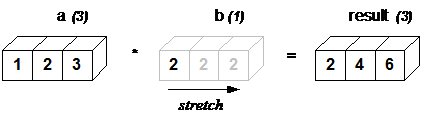

То же правило транслирования (broadcasting) применяется и к многомерным массивам.
Если вдоль какой-либо оси один из массивов имеет размер 1, а другой — произвольный размер, то массив с размером 1 «растягивается» вдоль этой оси, чтобы соответствовать размеру второго массива.
Таким образом, поэлементные операции (сложение, умножение и др.) между массивами возможны, если в каждом измерении их размеры либо совпадают, либо хотя бы один из них равен 1.

*Важное уточнение:*
Сопоставление размерностей происходит справа налево — от последней оси к первой.
Если количество измерений у массивов различается, то массив меньшей размерности автоматически дополняется слева единичными измерениями (размером 1).

Например, при сложении массива формы (4, 3) с массивом формы (3), последний сначала интерпретируется как (1, 3), после чего успешно «растягивается» до (4, 3).

In [ ]:
a = np.array([[ 0,  0,  0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])

b = np.array([0, 1, 2])

print(a + b)

Схематично проведенную операцию можно визуализировать следующим образом.

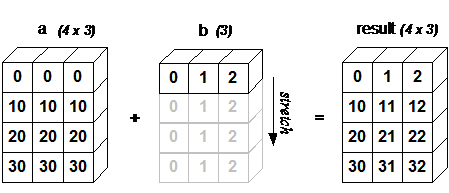


Если неединичные размерности справа не будут совпадать, то выполнить операцию уже не получится. Например, как приведено на схеме ниже.

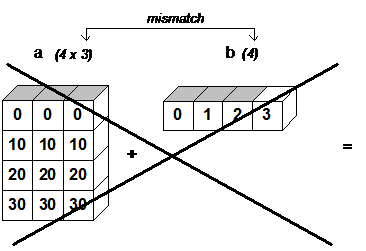


In [ ]:
a = np.array([[ 0,  0,  0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])

b = np.array([0, 1, 2, 4])

print(a + b)

Массив какого размера получится, если перемножить массив $5 \times 1 \times 4$ и массив $13 \times 1$?

In [ ]:

a = np.ones((5, 1, 3)) # 1 -> 13
b = np.ones((13, 1)) # +1 -> 1x13x1 -> 5x13x3

mul_shape = (a * b).shape
print(mul_shape)


Broadcasting — мощный и удобный механизм, но использовать его стоит осознанно.
Хотя явного копирования данных NumPy не производит, логика «растягивания» массивов может создавать иллюзию малого потребления памяти, в то время как на практике при выполнении операций может временно задействоваться объём памяти, эквивалентный полностью развёрнутому массиву.
Это особенно критично при работе с ограниченными ресурсами — например, на GPU, где неэффективное использование памяти легко приводит к переполнению или падению производительности.
Поэтому всегда стоит оценивать, не приведёт ли broadcasting к скрытым накладным расходам, и при необходимости — предпочитать явные операции или оптимизированные альтернативы.

## 5. Сохранение в файл и чтение из файла

In [ ]:
x = np.arange(0, 25, 0.5).reshape((5, 10))

# Сохраняем в файл example.txt данные x в формате с двумя точками после запятой и разделителем ';'
np.savetxt('example.txt', x, fmt='%.2f', delimiter=';')

Получится такой файл.

In [ ]:
! cat example.txt

Теперь его можно прочитать.

In [ ]:
x = np.loadtxt('example.txt', delimiter=';')
print(x)

## 6. Производительность numpy

Посмотрим на простой пример — сумма первых $10^8$ чисел.

In [ ]:
%%time

sum_value = 0
for i in range(10 ** 8):
    sum_value += i
print(sum_value)

Немного улучшенный код.

In [ ]:
%%time

sum_value = sum(range(10 ** 8))
print(sum_value)

Код с использованием функций библиотеки `numpy`.

In [ ]:
%%time

sum_value = np.arange(10 ** 8).sum()
print(sum_value)

Простой и понятный код работает в $30$ раз быстрее!

Посмотрим на другой пример. Сгенерируем матрицу размера $500\times1000$, и вычислим средний минимум по колонкам.

Простой код, но при этом даже использующий некоторые питон-функции.

*Замечание*. Далее с помощью `scipy.stats` происходит генерация случайных чисел из равномерного распределения на отрезке $[0, 1]$.

In [ ]:
import scipy.stats as sps

In [ ]:
%%time

N, M = 500, 1000
matrix = []
for i in range(N):
    matrix.append([sps.uniform.rvs() for j in range(M)])

min_col = [min([matrix[i][j] for i in range(N)]) for j in range(M)]
mean_min = sum(min_col) / N
print(mean_min)

Понятный код с использованием функций библиотеки numpy.

In [ ]:
%%time

N, M = 500, 1000
matrix = sps.uniform.rvs(size=(N, M))
mean_min = matrix.min(axis=1).mean()
print(mean_min)

Простой и понятный код работает в тысячу раз быстрее!

Так же можно воспользоваться отметками времени от начала вычислительного процесса, которые возвращает функция `perf_counter` из стандартной библиотеки `time` (при работе в других средах)

In [ ]:
import time

a = list(range(100000))
moment1 = time.perf_counter()
# код, скорость работы которого мы измеряем
a[::-1] = a
moment2 = time.perf_counter()
print(moment2 - moment1, "секунд потребовалось на выполнение.")

In [ ]:
a = np.array(range(100000))
moment1 = time.perf_counter()
# код, скорость работы которого мы измеряем
a[::-1] = a
moment2 = time.perf_counter()
print(moment2 - moment1, "секунд потребовалось на выполнение.")

так можно вручную выяснять скорость выполнения  кода. Однако, от запуска к запуску время работы кода будет отличаться. По-хорошему, код нужно выполнить некоторое количество раз, чтобы собрать статистику и вычислить среднее время выполнения.

Библиотека timeit содержит функцию timeit, которая запускает данный кусок кода столько раз, сколько вы напишите, и возвращает общее время выполнения кода в секундах:

In [ ]:
from timeit import timeit
timeit("a[::-1] = a", "a = list(range(100000))", number=1000)

In [ ]:
timeit("a[::-1] = a", "import numpy as np; a = np.array(range(100000))", number=1000)